<a href="https://colab.research.google.com/github/Kaua-Rbs/Deep-Learning-From-A-To-Z-With-Pytorch-And-Python/blob/main/Project_2_Cross_Validation_And_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: Breast Cancer Binary Classification - Cross Validaiton And Dropout

##Importing Libraries

In [1]:
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 1.6 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
from sklearn.model_selection import cross_val_score
torch.__version__

'2.3.0+cu121'

##Database

In [4]:
np.random.seed(123)
torch.manual_seed(123)

In [5]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

<Axes: xlabel='0', ylabel='count'>

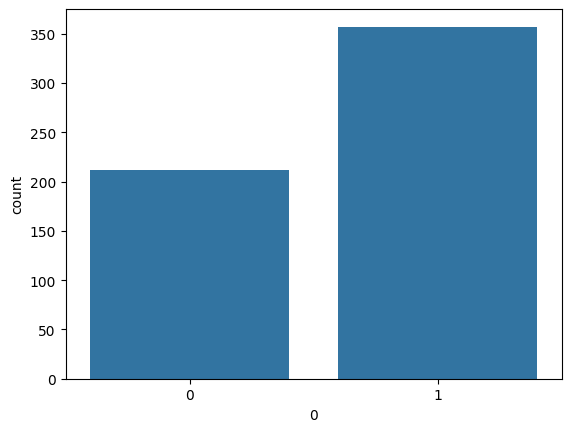

In [7]:
sns.countplot(x='0', data=classe)

In [9]:
classe.shape

(569, 1)

In [10]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [11]:
classe.shape

(569,)

In [12]:
type(previsores)

numpy.ndarray

##Neural Network Structure's Class Definition

In [25]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(30,16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X

##Skorch

In [30]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion = torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

##Cross Validation

In [31]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv=10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.3184
      2       37.1094  0.1188
      3       37.1094  0.1490
      4       37.1094  0.1388
      5       37.1094  0.1292
      6       37.1094  0.1416
      7       37.1094  0.1117
      8       37.1094  0.1040
      9       37.1094  0.1153
     10       37.1094  0.1097
     11       37.1094  0.1154
     12       37.1094  0.1079
     13       37.1094  0.1022
     14       37.1094  0.1059
     15       37.1094  0.1306
     16       37.1094  0.1043
     17       37.1094  0.1053
     18       37.1094  0.0987
     19       37.1094  0.1048
     20       37.1094  0.1173
     21       37.1094  0.1048
     22       37.1094  0.1128
     23       37.1094  0.1224
     24       37.1094  0.1121
     25       37.1094  0.1127
     26       37.1094  0.1016
     27       37.1094  0.1014
     28       37.1094  0.1082
     29       37.1094  0.1150
     30       37.1094  0.1075
     31       37.1094  0.1050
     32   

In [32]:
resultados.shape

(10,)

In [33]:
resultados

array([0.61403509, 0.8245614 , 0.89473684, 0.63157895, 0.87719298,
       0.87719298, 0.85964912, 0.89473684, 0.89473684, 0.875     ])

In [36]:
media = resultados.mean()
media

0.8243421052631579

In [37]:
desvio = resultados.std()
desvio

0.10278726570632164

##Dropout

In [38]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(30,16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X

In [39]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion = torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [40]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv=10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.1838
      2       37.1094  0.1440
      3       37.1094  0.1359
      4       37.1094  0.1361
      5       37.1094  0.1594
      6       37.1094  0.1777
      7       37.1094  0.1561
      8       37.1094  0.2025
      9       37.1094  0.1796
     10       37.1094  0.1651
     11       37.1094  0.2022
     12       37.1094  0.1760
     13       37.1094  0.1834
     14       37.1094  0.1132
     15       37.1094  0.1039
     16       37.1094  0.1509
     17       37.1094  0.1150
     18       37.1094  0.1337
     19       37.1094  0.1127
     20       37.1094  0.1229
     21       37.1100  0.1446
     22       37.1094  0.1193
     23       37.1094  0.1119
     24       37.1094  0.1250
     25       37.1094  0.1447
     26       37.1094  0.1695
     27       16.5991  0.1415
     28        0.6182  0.1158
     29        0.5858  0.1266
     30        0.5478  0.1183
     31        0.5557  0.1176
     32   

In [41]:
resultados

array([0.84210526, 0.80701754, 0.89473684, 0.94736842, 0.8245614 ,
       0.89473684, 0.85964912, 0.64912281, 0.87719298, 0.91071429])

In [43]:
media = resultados.mean()
media

0.8507205513784462

In [44]:
desvio = resultados.std()
desvio

0.07804201635767347